# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised


# **Project Summary -**

"Integrated retail analytics for Store Optimisation and Demand Forecasting" 

### Project Objective 

Use machine learning and data analysis techniques to optimize store performance, forecast demand and enhance customer experience through segmentation and personalized marketing strategies. 




# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

#Import XGBoost
import xgboost as xgb

#Import KMeans from scikit-learn
from sklearn.cluster import KMeans

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


### Dataset Loading

In [2]:
sales_df = pd.read_csv(r"dataset_week2_sales.csv")
stores_df = pd.read_csv(r"dataset_week2_stores.csv")
features_df = pd.read_csv(r"dataset_week2_features.csv")

### Dataset First View

In [3]:
# Dataset First Look
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [4]:
stores_df.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [5]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


### Merging datasets 

In [6]:
#Converting to datetime so merges work properly 
sales_df["Date"] = pd.to_datetime(sales_df["Date"], format="%d/%m/%Y")
features_df["Date"] = pd.to_datetime(features_df["Date"], format="%d/%m/%Y")

In [7]:
#merging 
data = sales_df.merge(features_df, on=["Store", "Date", "IsHoliday"], how="left")
data = data.merge(stores_df, on="Store", how="left")
data.head()
data2 = data.copy()
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


### Dataset Rows & Columns count

In [8]:
data.shape

(421570, 16)

### Dataset Information

In [9]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

### What did you know about your dataset?

For the Markdown columns over half of the values are missing / are Nan values hence imputing would skew results quite a bit and it makes more sense to dorp these values. 

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
data.columns


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [13]:
# Dataset Describe
data.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328


## 3. ***Data Wrangling***

### Data Wrangling/Cleaning Code

In [14]:
# Write your code to make your dataset analysis ready.
#Getting rid of Markdown columns 
columns_to_drop = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
data = data.drop(columns = columns_to_drop)
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


In [15]:
#imputing rest of columns with Mean
data['CPI'] = data['CPI'].fillna(data['CPI'].mean())
data['Unemployment'] = data['Unemployment'].fillna(data['Unemployment'].mean())
data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

#### Understanding features in more depth 

<b> Store: </b> 
     the store number 

<b> Date: </b>
    the week of sales 

<b> weekly sales: </b>
    sales for a given store 

<b> Unemployment rate: </b>
    Prevailing unemployment rate 

<b> Temperature: </b> 
    Temperature on the day of sale 

<b> Fuel price: </b>
    cost of fuel in the region 

In [16]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


In [17]:
# Adding month and year columns 
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,3,2010


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Univariate Analysis 

#### Chart 1-4 : Distribution of features 

C:\Users\Admin\AppData\Local\Temp\ipykernel_14016\3243565149.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


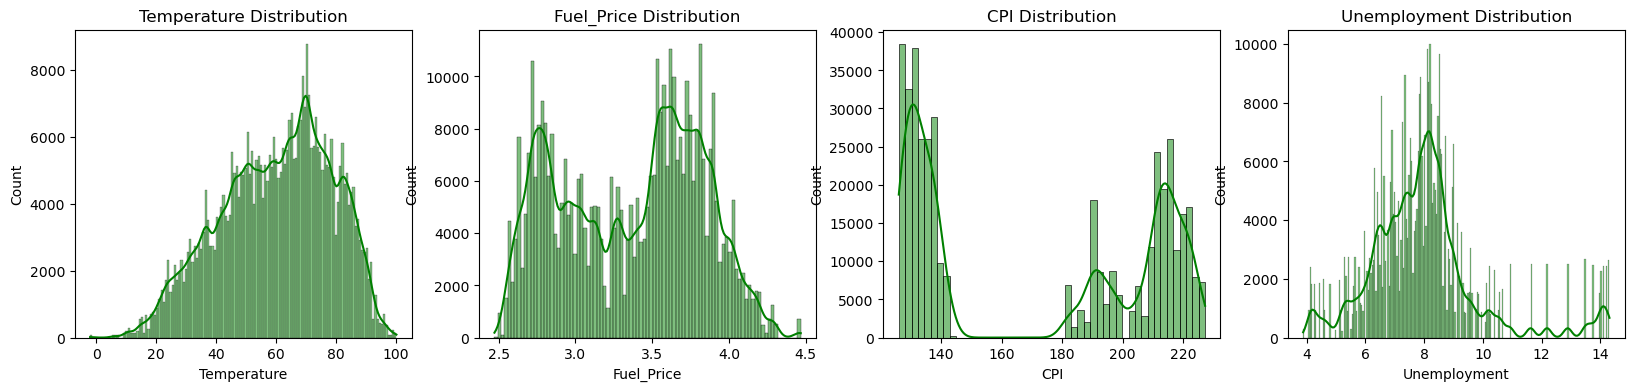

In [18]:
fig , ax = plt.subplots(1,4,figsize=(20,4))
cols = ['Temperature','Fuel_Price','CPI','Unemployment']
for i,col in enumerate(cols):
    sns.histplot(data,
                 x=col,
                 ax=ax[i],
                 kde=True,
                 color = 'green'
                )
    ax[i].set_title(f'{col} Distribution')
fig.show()    

##### Why did you pick this chart? What are the insights? Is there a positive Business impact

I picked this chart to look at the distribution of features. CPI and Fuel_Price have bimodal distribution.
Temperature and Unemployment have normal distribution.
This helps us understand the features better so there is no immediate business impact. 

#### Chart 5-8 : Box plot of features 

C:\Users\Admin\AppData\Local\Temp\ipykernel_14016\610114348.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


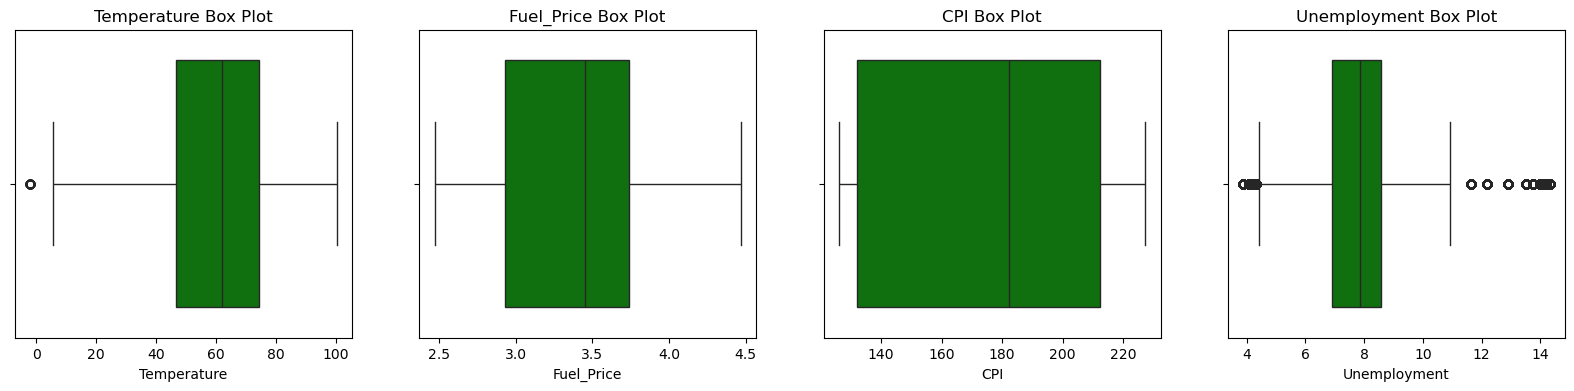

In [19]:
fig , ax = plt.subplots(1,4,figsize=(20,4))
cols = ['Temperature','Fuel_Price','CPI','Unemployment']
for i,col in enumerate(cols):
    sns.boxplot(data,
                 x=col,
                 ax=ax[i],
                 color = 'green'
                )
    ax[i].set_title(f'{col} Box Plot')
fig.show()    

##### Why did you pick this chart? What are the insights? Is there a positive Business impact

Again this is to visualise the features of the data and look at their means, median and quartiles or more generally the spread of data. 
We can see Unemployment has outliers that need to be handled. 

#### Chart 9. Weekly Sales Distribution 

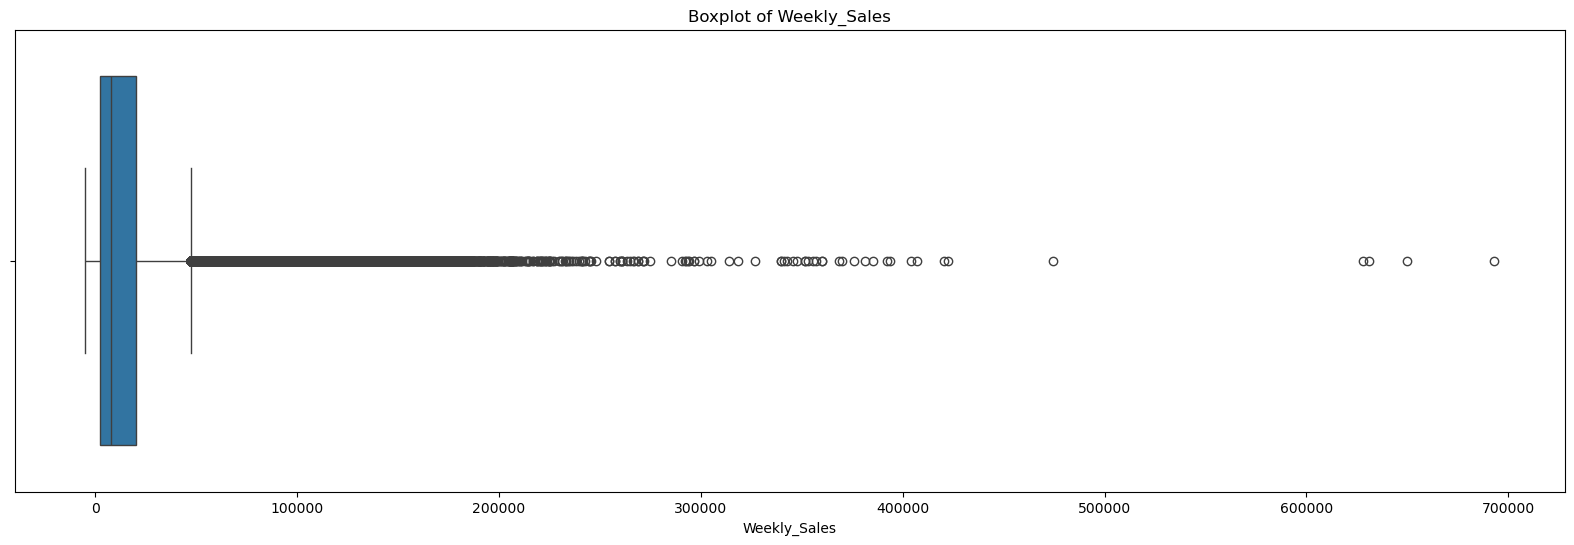

In [20]:
# Histogram

# Boxplot
plt.figure(figsize=(20,6))
sns.boxplot(x=data['Weekly_Sales'])
plt.title("Boxplot of Weekly_Sales")
plt.xlabel("Weekly_Sales")
plt.show()

##### Why did you pick this chart? What are the insights? Is there a positive Business impact
I picked this chart to look at the distribution of the Weekly sales. This way I can view  the spread, shape, and central tendencies of a dataset, helping to understand patterns andidentify outliers. We can see the Weekly_Sales distribution is right skewed as it has some outliers.

### Bivariate Analysis 

#### Chart - 10 : Total Sales Bar Chart for each store 

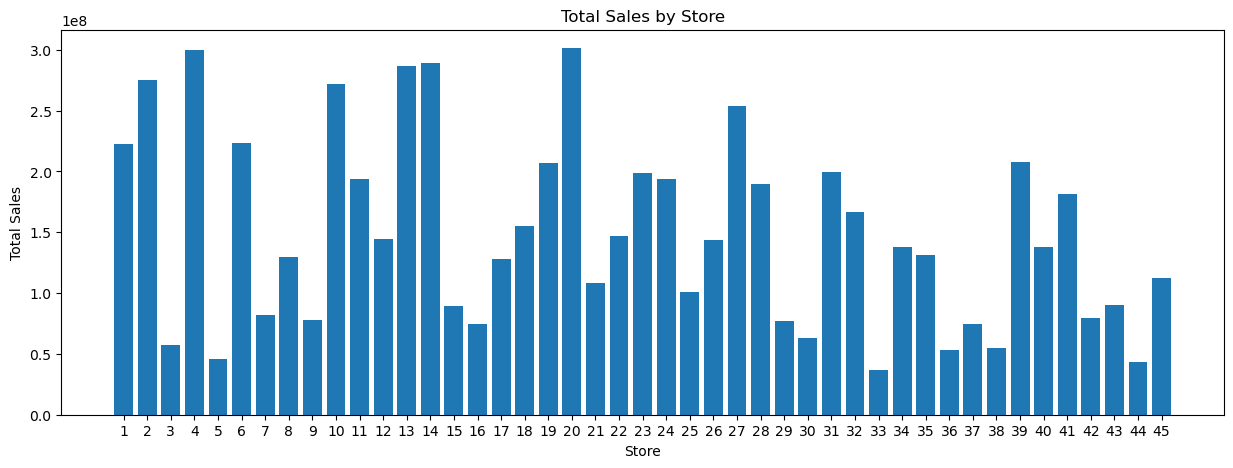

In [21]:
# Chart - 1 visualization code

# Group total sales by store
store_sales = data.groupby("Store")["Weekly_Sales"].sum()

# Plot bar chart
plt.figure(figsize=(15, 5))
plt.bar(store_sales.index, store_sales.values)
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.title("Total Sales by Store")
plt.xticks(store_sales.index)  # show all store numbers
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to visualise which stores had higher total sales count. 

##### 2. What is/are the insight(s) found from the chart?

We can see stores 2,4,10,12,14,20 have the highest sales where total sales surpasses 2.5 x 10**8. 

We can also identify very low peforming stores which are stores 3,5,33,44 as there net sales is below 0.5 x 10^8 dollars. 



##### 3. Will the gained insights help creating a positive business impact?

Yes by perhaps targeting lower performing stores in terms of strategy and looking into how to increase total sales. The business can look at the profit the store brings in as well as costs and see if the profit is worth it. 

The company can look at expanding higher peforming stores/ increasing the number of high value products to truly maximise sales. 

#### Chart - 11: Month vs Sales scatter plot 

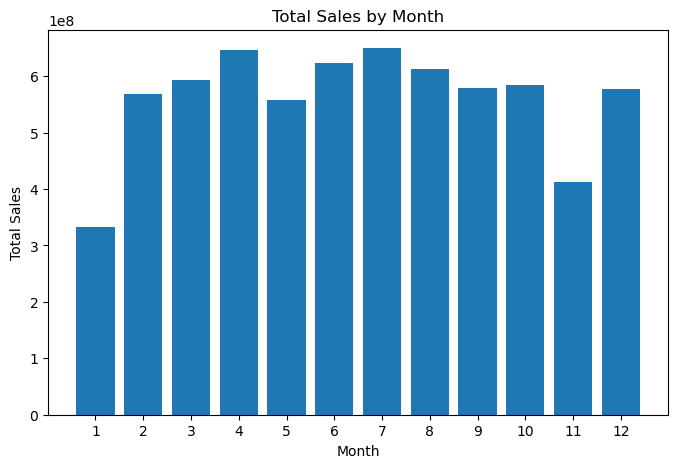

In [22]:
# Chart - 2 visualization code

# Ensure Date is datetime
data["Date"] = pd.to_datetime(data["Date"])

# Extract month (numeric or name)
data["Month"] = data["Date"].dt.month  # numeric month


# Group sales by month
month_sales = data.groupby("Month")["Weekly_Sales"].sum()

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(month_sales.index, month_sales.values)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales by Month")
plt.xticks(month_sales.index)  # show months in order
plt.show()

##### 1. Why did you pick the specific chart?

To visualise which months have the highest sales and which months have the lowest sales to inform strategy going forward. 

##### 2. What is/are the insight(s) found from the chart?

We can see the highest performing months are April and July. This makes sense as during April is the Easter holidays and during July is when Summer break begins as well as the 4th July. 

However one surprising insight is that December isn't one of the top performing months. This could suggest there isn't enough incentive to purchase items during Christmas and Boxing day and future sales strategy should look more into trying to optimise sales during December. 

##### 3. Will the gained insights help creating a positive business impact?
Yes this can potentially have a positive business impact as it shows areas for improvement and how the business can target lower performing months to optimise sales. 

#### Chart 12: Correlation Heat map 

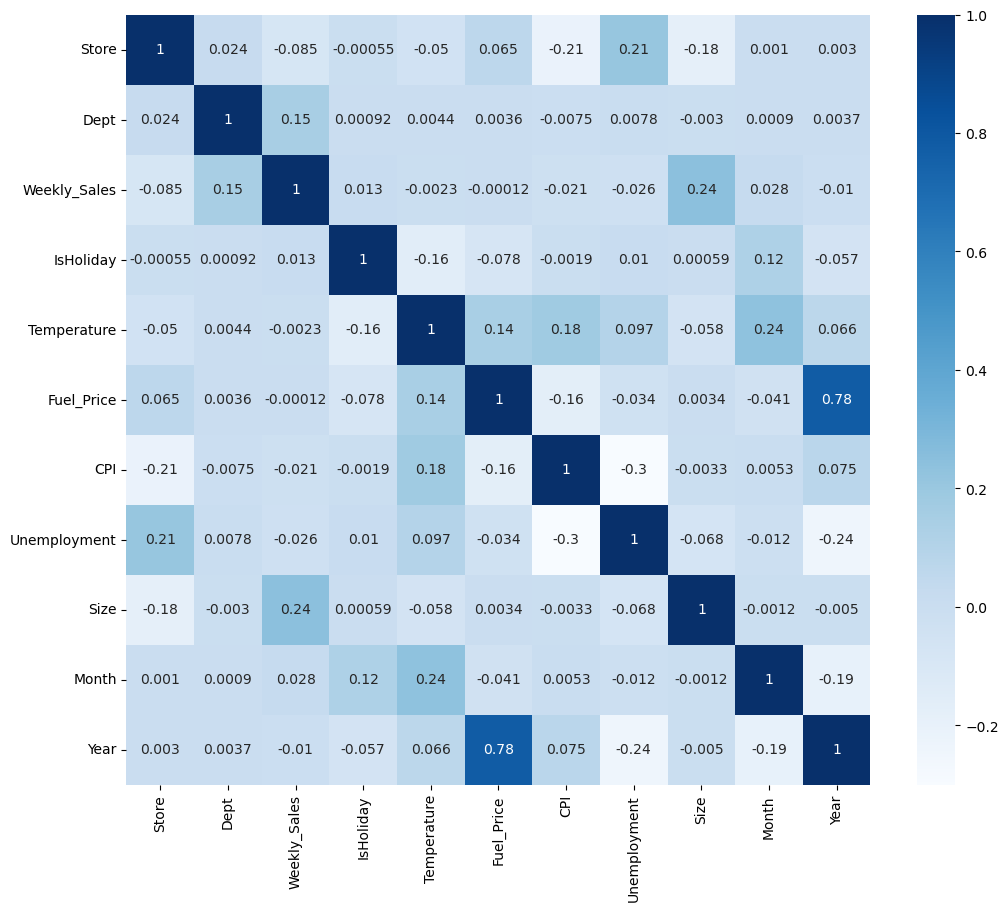

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(numeric_only=True),cmap='Blues',annot=True);

##### Why did you pick this chart? What are the insights? Is there a positive Business impact

I picked this heatmap to provide a quick, visual summary of the relationships between multiple variables in a dataset by using colors to represent the strength and direction of their correlations. As we can see there is a strong positive correlation between Year and Fuel_Price. 
This makes sense because global events, economic trends, supply and demand shifts, and national fiscal policies directly influence fuel costs over time. 
This suggests the Business should be more aware of these events to inform sales strategy. 


#### Chart 13-16: Bivariate analysis between features 

C:\Users\Admin\AppData\Local\Temp\ipykernel_14016\1439894964.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


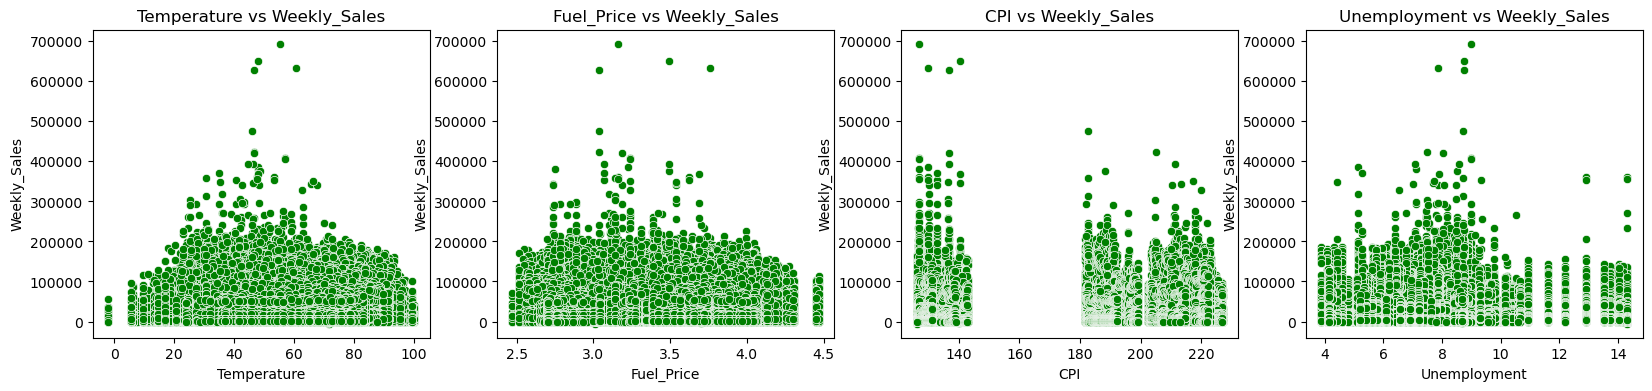

In [24]:
fig , ax = plt.subplots(1,4,figsize=(20,4))
cols = ['Temperature','Fuel_Price','CPI','Unemployment']
for i,col in enumerate(cols):
    sns.scatterplot(data,
                 y='Weekly_Sales',x=col,
                 ax=ax[i],
                 color = 'green'
                )
    ax[i].set_title(f'{col} vs Weekly_Sales')
fig.show()   

##### Why did you pick this chart? What are the insights? Is there a positive Business impact

I picked these chart to  determine if a relationship exists between two variables, and to understand the nature, strength, and direction of that relationship. Here we can see that there isn't necessarily a strong positive or negative correlation but the relationship almost mirror the normal and bimodal distributions we saw earlier. There is on immediate positve business impact from this. 

## ***6. Feature Engineering & Data Pre-processing***

### 1. Data Cleaning 

We have already cleaned the dataset above 

### 2. Handling Outliers

In [25]:
# Getting rid of outliers by using quartile filtering 
num_features = ['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']
for feature in num_features:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    data = data[(data[feature] >= lower) & (data[feature] <= upper)]

##### What all outlier treatment techniques have you used and why did you use those techniques?


- **Technique Used:** IQR-based filtering  
- **How:** For each numerical feature, values outside `[Q1 - 1.5×IQR, Q3 + 1.5×IQR]` were removed.  
- **Why:**  
  - Robust to skewed data (no normality assumption).  
  - Standard statistical rule (boxplot method).  
  - Simple, interpretable, and reduces noise.  
  - Improves model performance by removing extreme values.  

Note: Rows are dropped if any feature is an outlier, which may reduce dataset size.


### 3. Categorical Encoding

In [26]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,3,2010


In [27]:
# Encode your categorical columns
# One-hot encode 'Type'
data = pd.get_dummies(data, columns=['Type'], prefix='Type')

data["IsHoliday"] = data["IsHoliday"].astype(int)



In [28]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Month,Year,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,151315,2,2010,True,False,False
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,151315,2,2010,True,False,False
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,151315,2,2010,True,False,False
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,151315,2,2010,True,False,False
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,151315,3,2010,True,False,False


#### What all categorical encoding techniques have you used & why did you use those techniques?

1. One hot encoding
       - this works well for features like Type
2. Binary/Integer type encoding
       - this works well for simple 0/1 flags 

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [29]:
# Manipulate Features to minimize feature correlation and create new features
data["Lag_1"] = data.groupby(["Store","Dept"])["Weekly_Sales"].shift(1)
data["Rolling_Mean_4"] = data.groupby(["Store","Dept"])["Weekly_Sales"].shift(1).rolling(4).mean()
data["Rolling_Mean_12"] = data.groupby(["Store","Dept"])["Weekly_Sales"].shift(1).rolling(12).mean()
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Month,Year,Type_A,Type_B,Type_C,Lag_1,Rolling_Mean_4,Rolling_Mean_12
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,151315,2,2010,True,False,False,NaN,NaN,NaN
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,151315,2,2010,True,False,False,24924.50,NaN,NaN
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,151315,2,2010,True,False,False,46039.49,NaN,NaN
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,151315,2,2010,True,False,False,41595.55,NaN,NaN
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,151315,3,2010,True,False,False,19403.54,32990.77,NaN


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [30]:
# Transform Your data
#Log-transform Weekly_Sales (skewed)
data["Log_Weekly_Sales"] = np.log1p(data["Weekly_Sales"])

C:\Users\Admin\Coding_Programs\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Admin\Coding_Programs\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


The data does need to be transformed as Weekly Sales is extrememly high and could skew predictions. Here I used log transformation as the Weekly Sales figure is in the powers of 10. 

### 6. Data Scaling

In [32]:
# Scaling your data


#Scale numeric features
scaler = StandardScaler()
num_cols = ["Temperature", "Fuel_Price", "CPI", "Unemployment", "Size"]

data[num_cols] = scaler.fit_transform(data[num_cols])
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Month,Year,Type_A,Type_B,Type_C,Lag_1,Rolling_Mean_4,Rolling_Mean_12,Log_Weekly_Sales
0,1,1,2010-02-05,24924.50,0,-0.937961,-1.680992,0.936869,0.323692,0.285941,2,2010,True,False,False,NaN,NaN,NaN,10.123647
1,1,1,2010-02-12,46039.49,1,-1.143672,-1.733437,0.940621,0.323692,0.285941,2,2010,True,False,False,24924.50,NaN,NaN,10.737277
2,1,1,2010-02-19,41595.55,0,-1.066801,-1.807734,0.941830,0.323692,0.285941,2,2010,True,False,False,46039.49,NaN,NaN,10.635773
3,1,1,2010-02-26,19403.54,0,-0.704100,-1.705029,0.942615,0.323692,0.285941,2,2010,True,False,False,41595.55,NaN,NaN,9.873262
4,1,1,2010-03-05,21827.90,0,-0.711138,-1.565176,0.943400,0.323692,0.285941,3,2010,True,False,False,19403.54,32990.77,NaN,9.990990


##### Which method have you used to scale you data and why?

I used the Standard Scaler method to normalise the data so there is a mean of 0 and standard deviation of 1. This will help with the evaluation metrics for the end ML model. 


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is not needed for this dataset as this technique is used when there are hundreds or even thousands of features/ for high dimensionality data. It can also be used for multi-collinearity when features are highly correlated. 
However this is a low dimensional data set with less than 20 features hence it is not needed. 

### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In Regression imbalanced data  refers to situations where the distribution of target values is skewed, with a small number of outlier values (very high or very low) compared to the rest of the data. This imbalance can make it difficult for models to learn effectively from these rare, extreme values.
By getting rid of outliers we have made the dataset more balanced. 


### 9. Post Feature Engineering cleaning 

In [33]:
data.isnull().sum()

Store                   0
Dept                    0
Date                    0
Weekly_Sales            0
IsHoliday               0
Temperature             0
Fuel_Price              0
CPI                     0
Unemployment            0
Size                    0
Month                   0
Year                    0
Type_A                  0
Type_B                  0
Type_C                  0
Lag_1                3183
Rolling_Mean_4      12508
Rolling_Mean_12     36502
Log_Weekly_Sales     1163
dtype: int64

In [34]:
#Drop rows where values are missing 
data = data[~data["Log_Weekly_Sales"].isna()]

# Filling NaNs using imputation
data["Lag_1"] = data["Lag_1"].fillna(0)   # or Weekly_Sales mean/median
data["Rolling_Mean_4"] = data["Rolling_Mean_4"].fillna(data["Rolling_Mean_4"].mean())
data["Rolling_Mean_12"] = data["Rolling_Mean_12"].fillna(data["Rolling_Mean_12"].mean())

data.isnull().sum()

Store               0
Dept                0
Date                0
Weekly_Sales        0
IsHoliday           0
Temperature         0
Fuel_Price          0
CPI                 0
Unemployment        0
Size                0
Month               0
Year                0
Type_A              0
Type_B              0
Type_C              0
Lag_1               0
Rolling_Mean_4      0
Rolling_Mean_12     0
Log_Weekly_Sales    0
dtype: int64

In [55]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Month,Year,Type_A,Type_B,Type_C,Lag_1,Rolling_Mean_4,Rolling_Mean_12,Log_Weekly_Sales
0,1,1,2010-02-05,24924.50,0,-0.937961,-1.680992,0.936869,0.323692,0.285941,2,2010,True,False,False,0.00,10471.879059,10468.953327,10.123647
1,1,1,2010-02-12,46039.49,1,-1.143672,-1.733437,0.940621,0.323692,0.285941,2,2010,True,False,False,24924.50,10471.879059,10468.953327,10.737277
2,1,1,2010-02-19,41595.55,0,-1.066801,-1.807734,0.941830,0.323692,0.285941,2,2010,True,False,False,46039.49,10471.879059,10468.953327,10.635773
3,1,1,2010-02-26,19403.54,0,-0.704100,-1.705029,0.942615,0.323692,0.285941,2,2010,True,False,False,41595.55,10471.879059,10468.953327,9.873262
4,1,1,2010-03-05,21827.90,0,-0.711138,-1.565176,0.943400,0.323692,0.285941,3,2010,True,False,False,19403.54,32990.770000,10468.953327,9.990990


## ***7. ML Model Implementation***

## ML Model - 1: XGboost 

In [35]:
!pip install xgboost


#### 1. Prepare features and target

In [36]:
# ML Model - 1 Implementation


# Prepare features and target
feature_cols = [
    "Store", "Dept", "Temperature", "Fuel_Price", "CPI", "Unemployment",
    "Size", "Type_B", "Type_C", "IsHoliday",
    "Lag_1", "Rolling_Mean_4", "Rolling_Mean_12",
    "Month", "Year"
]

X = data[feature_cols]
y = data["Weekly_Sales"]  




#### 2. Train -test split

In [37]:
#Split into train/test based on date 
train = data[data["Date"] < "2012-01-01"]
test  = data[data["Date"] >= "2012-01-01"]

X_train, y_train = train[feature_cols], train["Weekly_Sales"]
X_test, y_test   = test[feature_cols], test["Weekly_Sales"]


#### 3. Train the model 

In [41]:
# using xgboost for the ML algorithm 

model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=11, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


#### 4. Evaluate the model

In [42]:
# Evaluate 


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 1991.223886960926


In [43]:


r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.4f}")


R² score: 0.9680


#### 5. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

XGboost is a boosting algorithm that learn from its mistakes. An R^2 value of 0.9680 is almost perfect hence this is a good model. 

#### 6. Cross- Validation & Hyperparameter Tuning

##### 1. Define base XGboost regressor 

In [44]:
#  base XGBoost regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # standard regression
    random_state=42,
    n_jobs=-1
)


##### 2. Defining Hyperparameter search space 

In [45]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 0.5, 1, 5]
}

In [46]:
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,             # number of random trials
    scoring='r2',          # use R² score
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [47]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1],
                                        'gamma': [0, 0.1, 0.3, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.01, 0.1, 1],
                                        'reg_lambda': [0.1, 0.5, 1, 5],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1]},
                   random_state=42, scoring='r2', verbose=2)

In [48]:
best_xgb = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)
print("Best cross-validated R²:", random_search.best_score_)

Best parameters: {'subsample': 1, 'reg_lambda': 5, 'reg_alpha': 0.01, 'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 1}
Best cross-validated R²: 0.9628075318457018


In [49]:
y_pred = best_xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.4f}")

Test RMSE: 1948.03
Test R²: 0.9694


##### Which hyperparameter optimization technique have you used and why?

Here I used the random search optimisation method as it is efficent and quick. 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Hyperparameter tuning has slightly improved both RMSE and R^2. 
The tuned model indicates my model benefits from deeper trees (max_depth=10), moderate regularization (reg_lambda=5, reg_alpha=0.01), full subsampling, and more boosting rounds (n_estimators=400).

The best parameter found are: {'subsample': 1, 'reg_lambda': 5, 'reg_alpha': 0.01, 
 'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.1, 
 'gamma': 0.3, 'colsample_bytree': 1}



### ML Model - 2: HistGradientBoostingRegressor Algorithm 

#### 1. Define model + simple model fit 


In [50]:
hgb_model = HistGradientBoostingRegressor(random_state=42)

#### 2. Hyperparameter search space 

In [51]:
param_dist = {
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_leaf_nodes': [15, 31, 63],
    'min_samples_leaf': [20, 50, 100],
    'l2_regularization': [0, 0.1, 1.0]
}


#### 3. Randomized Seach CV 

In [52]:
random_search = RandomizedSearchCV(
    estimator=hgb_model,
    param_distributions=param_dist,
    n_iter=20,            # number of random trials
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

#### 4. Fitting the model using Hyperparameter Optimisation embedded 

In [53]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Admin\Coding_Programs\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Admin\Coding_Programs\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Admin\Coding_Programs\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\Coding_Programs\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Admin\Coding_Programs\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht

RandomizedSearchCV(cv=5,
                   estimator=HistGradientBoostingRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'l2_regularization': [0, 0.1, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7, None],
                                        'max_iter': [100, 200, 300],
                                        'max_leaf_nodes': [15, 31, 63],
                                        'min_samples_leaf': [20, 50, 100]},
                   random_state=42, scoring='r2', verbose=1)

#### 5. Best Model and evaluation

In [54]:
best_model = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)
print("Best CV R²:", random_search.best_score_)

y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.4f}")


Best parameters: {'min_samples_leaf': 50, 'max_leaf_nodes': 31, 'max_iter': 300, 'max_depth': None, 'learning_rate': 0.1, 'l2_regularization': 1.0}
Best CV R²: 0.9576008949725392
Test RMSE: 2024.52
Test R²: 0.9669


##### Which hyperparameter optimization technique have you used and why?

I chose Random Search as it is a quick and efficient way of hyperparameter optimisation. It is better than grid search as it is quicker and doesn't test out every single combination in a pre-defined grid. 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

This is not an improvement from XGboost. 

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


When evaluating regression models, two common metrics are R² (Coefficient of Determination) and RMSE (Root Mean Squared Error).  



 1. **R² (Coefficient of Determination)**
    - R² indicates the proportion of variance in the target variable explained by the model.  
  - R² = 1 → Perfect predictions  
  - R² = 0 → Model does no better than predicting the mean   

2. **RMSE (Root Mean Squared Error)**
 
  RMSE is the square root of the average squared differences between predicted and actual values.  
  RMSE gives a direct sense of "how far off" predictions are on average.  

---

Accurate Sales forecasting helps the store optimise inventory, reduce stockouts, and overstock costs whilst also improving overall profitability and customer satisfaction. 



## ML Model - 3: K-means (For Store Segmentation) 

Market basket analysis: Not feasible, because you don’t know which products were bought together, only total weekly sales per department. For this sort of analysis, you need transaction-level data with customer IDs 

Customer segmentation: Not feasible either, because you don’t have CustomerID or individual transactions.

1. Store department clustering/ segmentation
       - cluster stores or department based on pattern of weekly sales, CPI , unemployment etc.
       - example K means to find "high volume vs low volume stores" or "stable vs seasoal sales departments" 

#### 1. Aggregating by store + scaling feautres 

In [57]:
#  Aggregate store-level features
store_features = data.groupby("Store").agg({
    "Weekly_Sales": "mean",
    "CPI": "mean",
    "Unemployment": "mean",
    "Temperature": "mean",
    "Fuel_Price": "mean",
    "Size": "mean"
}).reset_index()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(store_features.drop("Store", axis=1))


#### 2. Optimal number of clusters + evaluation

In [64]:
#Loop over k values and evaluate
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
results = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    ch = calinski_harabasz_score(X_scaled, labels)
    
    results.append((k, sil, db, ch))

C:\Users\Admin\Coding_Programs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\Coding_Programs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\Coding_Programs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\Coding_Programs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have

#### 3. Picking best K 

In [65]:
results_df = pd.DataFrame(results, columns=["k", "Silhouette", "Davies-Bouldin", "Calinski-Harabasz"])
print(results_df)

#Pick the "best k"
best_k = results_df.loc[results_df["Silhouette"].idxmax(), "k"]
print(f"Best number of clusters (based on Silhouette): {best_k}")

    k  Silhouette  Davies-Bouldin  Calinski-Harabasz
0   2    0.284086        1.588436          14.167261
1   3    0.246277        1.319593          16.474268
2   4    0.290490        1.079929          19.141509
3   5    0.307298        1.027742          18.298961
4   6    0.301588        1.078241          18.080635
5   7    0.318381        1.013130          18.090035
6   8    0.317130        1.003589          18.213912
7   9    0.310805        0.974023          18.025921
8  10    0.294429        1.002336          17.589783
Best number of clusters (based on Silhouette): 7


#### 4.Fitting final model and inspecting results


In [66]:

#Fit final model
kmeans = KMeans(n_clusters=int(best_k), random_state=42, n_init=10)
store_features["Cluster"] = kmeans.fit_predict(X_scaled)

C:\Users\Admin\Coding_Programs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [69]:

#Inspect results
print(store_features.head(10))

   Store  Weekly_Sales       CPI  Unemployment  Temperature  Fuel_Price  \
0      1  12837.248594  1.062413     -0.076231     0.470798   -0.270476   
1      2  14370.084987  1.054750     -0.069499     0.463768   -0.255422   
2      3   4703.720458  1.150624     -0.429019     0.631135   -0.266987   
3      4  14096.930597 -1.200059     -1.008890    -0.030134   -0.471349   
4      5   4317.096899  1.077724     -1.140095     0.517264   -0.264344   
5      6  14662.193000  1.102477     -0.886889     0.539951   -0.265499   
6      7   7899.814978  0.488426      0.711106    -1.069872   -0.220143   
7      8  10775.313095  1.151511     -1.306364     0.156580   -0.266152   
8      9   7537.387216  1.157865     -1.303064     0.435861   -0.256063   
9     10  13708.683552 -1.184372      0.532358     0.690719    0.514446   

       Size  Cluster  
0  0.285941        4  
1  1.123082        4  
2 -1.584344        3  
3  1.181461        0  
4 -1.625666        3  
5  1.126332        4  
6 -1.037310  

In [70]:
df = pd.DataFrame(store_features)

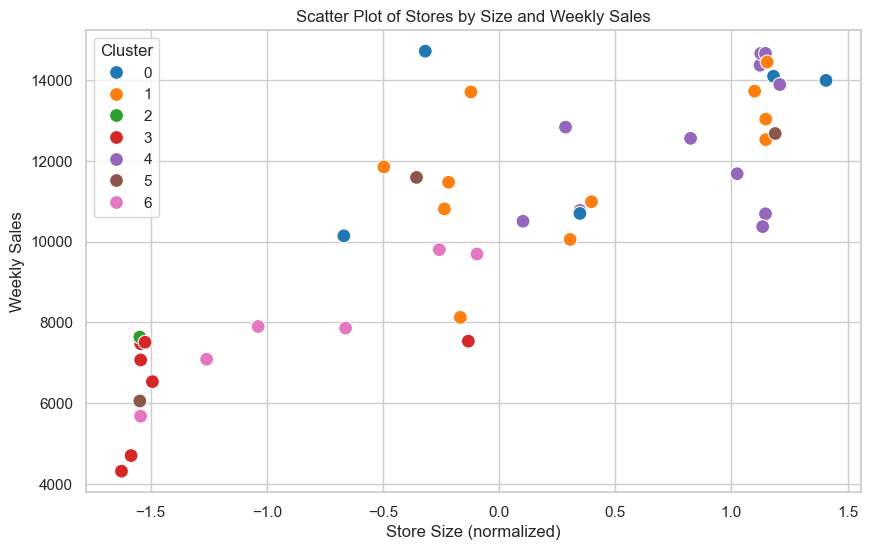

In [71]:

sns.set(style="whitegrid")

#Scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df,
    x='Size',
    y='Weekly_Sales',
    hue='Cluster',
    palette='tab10',  # 10 distinct colors
    s=100  # marker size
)

#Labels and title
plt.xlabel('Store Size (normalized)')
plt.ylabel('Weekly Sales')
plt.title('Scatter Plot of Stores by Size and Weekly Sales')
plt.legend(title='Cluster')
plt.show()

Here we can see the different clusters and how they peform. Cluster 4 and cluster 1 tend to peform better whilst clusters 6 and cluster 3 don't peform as well. This can inform strategy / which clusters of stores to target. 

###  Which ML model did you choose from the above created models as your final prediction model and why?

I used the XGboost model as my final model as it had the best performance with an R^2 value of 0.9694. However I used the XGboost model with the following parameters: {'subsample': 1, 'reg_lambda': 5, 'reg_alpha': 0.01, 'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 1}. 

## 8. Application of External factors + Strategy and Real World Application

#### Market Basket Analysis 
- Not possible to do this as we don't have customer ID and different items to group different items together

  
#### Application of external factors 
- There is no correlation between CPI and sales, unemployment rates and sales , or fuel prices and sales 

#### Strategy and Real world application


##### 1. Store Performance
- **High-performing stores (2,4,10,12,14,20):** Expand footprint, increase high-value product stock, run premium campaigns.  
- **Low-performing stores (3,5,33,44):** Analyze root causes, implement targeted promotions, consider consolidation if consistently low-performing.  

##### 2. Seasonal Sales
- **Peak months:** April (Easter), July (Summer/4th July) → stock inventory, run seasonal promotions.  
- **Underperforming month:** December → improve holiday campaigns, offer bundles/discounts, boost online sales.  

##### 3. Inventory Management
- Use **store-level demand clustering** to optimize stock levels.  
- High-performing stores → higher inventory turnover; low-performing stores → tailored stock to test local demand.  

##### 4. Marketing Strategy
- Geo-targeted campaigns for high-performing stores.  
- Localized promotions and loyalty programs for low-performing stores.  
- Seasonal campaigns to boost underperforming months.  

##### 5. Next Steps
- Conduct **profitability analysis** per store.  
- Use **predictive analytics** for inventory & marketing.  
- Apply **cross-store strategies**: replicate high-performing product mixes in low-performing stores.  



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***